In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/PoemFinalDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./PoemFinalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,آن مه که وفا و حسن سرمایهٔ اوست اوج فلک حسن ک...,abusaeed
1,ای در دل من اصل تمنا همه تو وی در سر من مایهٔ...,abusaeed
2,گفتم صنما لاله رخا دلدارا در خواب نمای چهره با...,abusaeed
3,فردا که زوال شش جهت خواهد بود قدر تو به قدر م...,abusaeed
4,دیریست که تیر فقر را آماجم بر طارم افلاک فلاک...,abusaeed
...,...,...
4598,در مهر ماه زهدم و دینم خراب شد ایمان و کفر من...,sanaee
4599,ای مهر تو بر سینهٔ من مهر نهاده ای عشق تو از ...,sanaee
4600,گر شبی عشق تو بر تخت دلم شاهی کند صدهزاران ما...,sanaee
4601,صنما چبود اگر بوسگکی وام دهی نه برآشوبی هر سا...,sanaee


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,آن مه که وفا و حسن سرمایه اوست اوج فلک حسن کمی...,abusaeed
1,ای در دل من اصل تمنا همه تو وی در سر من مایه س...,abusaeed
2,گفتم صنما لاله رخا دلدارا در خواب نمای چهره با...,abusaeed
3,فردا که زوال شش جهت خواهد بود قدر تو به قدر مع...,abusaeed
4,دیریست که تیر فقر را آماجم بر طارم افلاک فلاکت...,abusaeed
...,...,...
4598,در مهر ماه زهدم و دینم خراب شد ایمان و کفر من ...,sanaee
4599,ای مهر تو بر سینه من مهر نهاده ای عشق تو از دی...,sanaee
4600,گر شبی عشق تو بر تخت دلم شاهی کند صدهزاران ماه...,sanaee
4601,صنما چبود اگر بوسگکی وام دهی نه برآشوبی هر ساع...,sanaee


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,مه وفا حسن سرمایه اوج فلک حسن کمین پایه خورشید...,abusaeed
1,دل اصل تمنا مایه سودا روزگار نگرم تویی,abusaeed
2,صنما لاله رخا دلدارا خواب نمای چهره باری یارا ...,abusaeed
3,زوال معرفت حسن صفت کوش جزا حشر صفت,abusaeed
4,دیریست تیر فقر آماجم طارم افلاک فلاکت تاجم شمه...,abusaeed
...,...,...
4598,مهر ماه زهدم دینم خراب ایمان کفر شراب زهدم منا...,sanaee
4599,مهر سینه مهر نهاده عشق آب گشاده کمر بندگی احرا...,sanaee
4600,شبی عشق تخت شاهی صدهزاران ماه شب خدمت ماهی لطف...,sanaee
4601,صنما چبود بوسگکی وام برآشوبی ساعت دشنام دام گش...,sanaee


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,مه وفا حسن سرمایه اوج فلک حسن کمین پایه خورشید...,abusaeed
1,دل اصل تمنا مایه سودا روزگار نگرم تویی,abusaeed
2,صنما لاله رخا دلدارا خواب نمای چهره باری یارا ...,abusaeed
3,زوال معرفت حسن صفت کوش جزا حشر صفت,abusaeed
4,دیریست تیر فقر آماجم طارم افلاک فلاکت تاجم شمه...,abusaeed
...,...,...
4598,مهر ماه زهدم دینم خراب ایمان کفر شراب زهدم منا...,sanaee
4599,مهر سینه مهر نهاده عشق آب گشاده کمر بندگی احرا...,sanaee
4600,شبی عشق تخت شاهی صدهزاران ماه شب خدمت ماهی لطف...,sanaee
4601,صنما چبود بوسگکی وام برآشوبی ساعت دشنام دام گش...,sanaee


moulavi     1225
attar       1224
abusaeed     724
saadi        500
hafez        495
sanaee       435
Name: poet, dtype: int64


<Axes: >

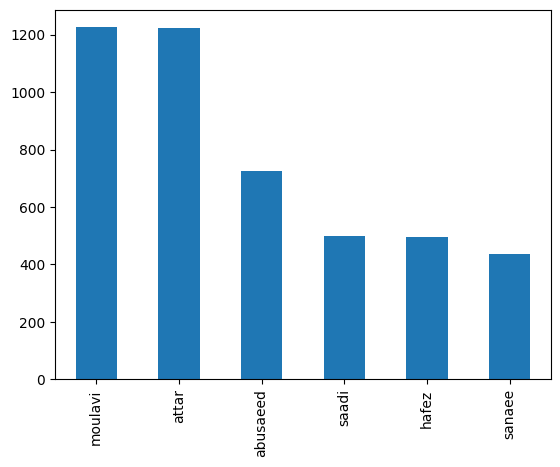

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,مه وفا حسن سرمایه اوج فلک حسن کمین پایه خورشید...,abusaeed,0
1,دل اصل تمنا مایه سودا روزگار نگرم تویی,abusaeed,0
2,صنما لاله رخا دلدارا خواب نمای چهره باری یارا ...,abusaeed,0
3,زوال معرفت حسن صفت کوش جزا حشر صفت,abusaeed,0
4,دیریست تیر فقر آماجم طارم افلاک فلاکت تاجم شمه...,abusaeed,0
...,...,...,...
4598,مهر ماه زهدم دینم خراب ایمان کفر شراب زهدم منا...,sanaee,5
4599,مهر سینه مهر نهاده عشق آب گشاده کمر بندگی احرا...,sanaee,5
4600,شبی عشق تخت شاهی صدهزاران ماه شب خدمت ماهی لطف...,sanaee,5
4601,صنما چبود بوسگکی وام برآشوبی ساعت دشنام دام گش...,sanaee,5


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'abusaeed': 0, 'attar': 1, 'hafez': 2, 'moulavi': 3, 'saadi': 4, 'sanaee': 5}
id2label: {0: 'abusaeed', 1: 'attar', 2: 'hafez', 3: 'moulavi', 4: 'saadi', 5: 'sanaee'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoConfig, AutoTokenizer

MODEL_NAME = 'm3hrdadfi/albert-fa-base-v2-clf-digimag'
config = AutoConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

max:  494
min:  5


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

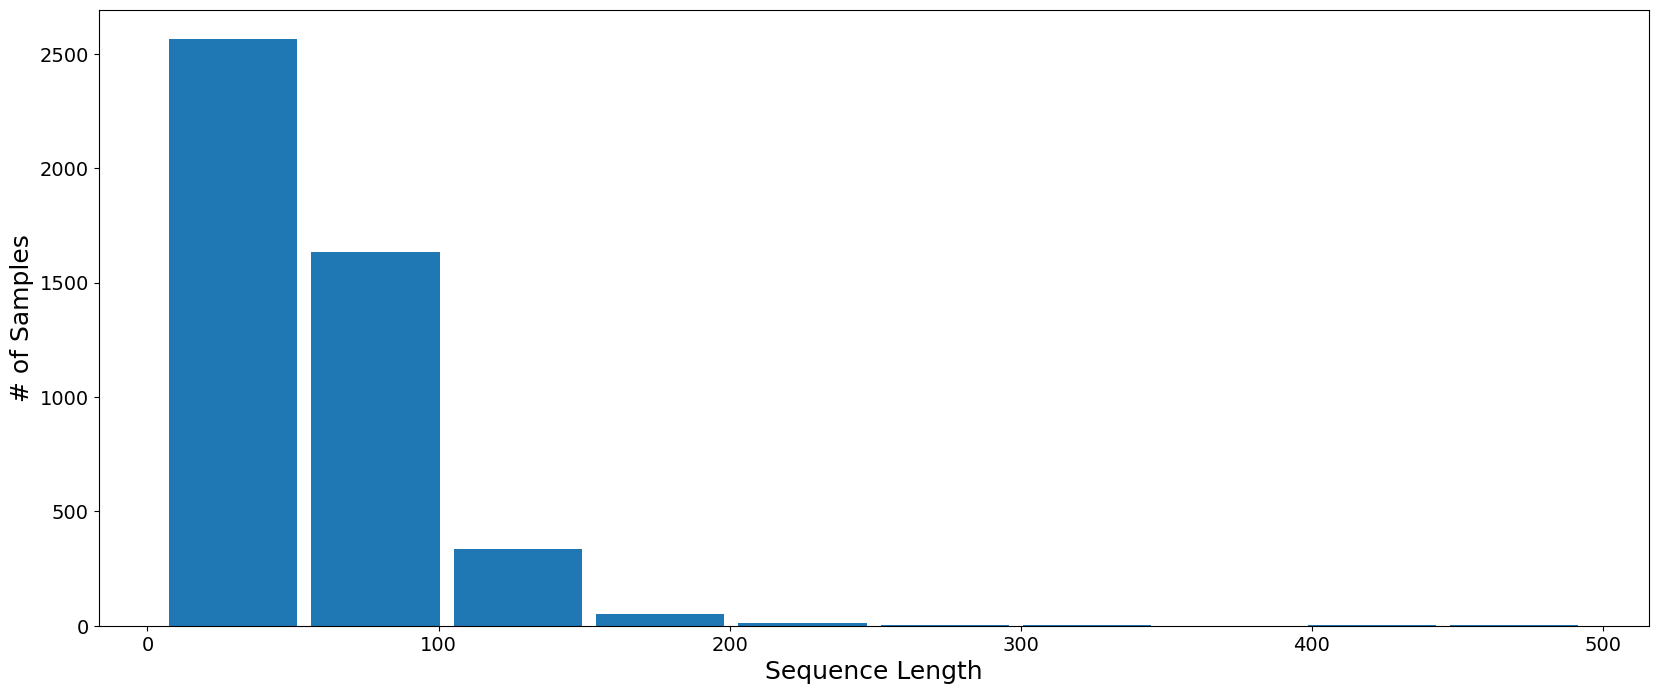

In [ ]:
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.poem.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
SEQ_LEN = 256
BATCH_SIZE = 32

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
test_labels = to_categorical(y_test_le)
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFBertForSequenceClassification
base_model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
classificationResult = base_model([input_ids, mask]).logits
Final_output = tf.keras.layers.Dense(6, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalFocalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
115/115 [==============================] - 270s 2s/step - loss: 0.1670 - accuracy: 0.5065 - val_loss: 0.0685 - val_accuracy: 0.7462
Epoch 2/5
115/115 [==============================] - 204s 2s/step - loss: 0.0552 - accuracy: 0.7908 - val_loss: 0.0615 - val_accuracy: 0.7812
Epoch 3/5
115/115 [==============================] - 204s 2s/step - loss: 0.0300 - accuracy: 0.8802 - val_loss: 0.0678 - val_accuracy: 0.7900
Epoch 4/5
115/115 [==============================] - 203s 2s/step - loss: 0.0134 - accuracy: 0.9470 - val_loss: 0.0796 - val_accuracy: 0.7875
Epoch 5/5
115/115 [==============================] - 209s 2s/step - loss: 0.0076 - accuracy: 0.9660 - val_loss: 0.0917 - val_accuracy: 0.7975


In [ ]:
final_accuracy = history.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

FINAL ACCURACY:  0.7805000066757202


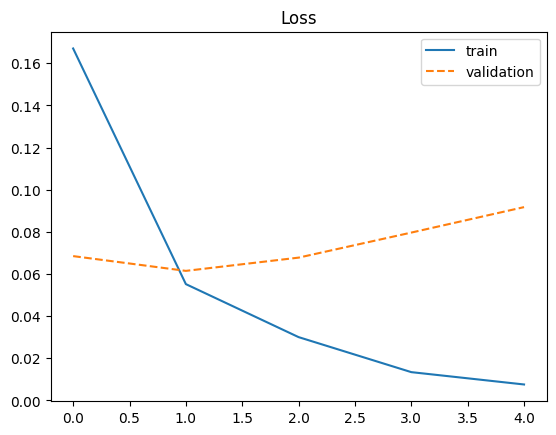

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation', linestyle='dashed')
plt.legend()
plt.show();

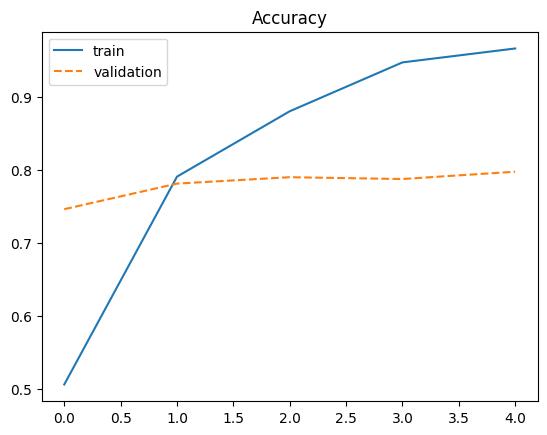

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation', linestyle='dashed')
plt.legend()
plt.show();

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

2/2 [==============================] - 1s 574ms/step - loss: 0.0822 - accuracy: 0.7969


In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

    abusaeed       0.64      0.82      0.72        11
       attar       0.94      0.77      0.85        22
       hafez       1.00      0.93      0.97        15
     moulavi       0.77      0.77      0.77        30
       saadi       1.00      1.00      1.00         6
      sanaee       0.73      0.89      0.80         9

    accuracy                           0.83        93
   macro avg       0.85      0.86      0.85        93
weighted avg       0.84      0.83      0.83        93



<Axes: >

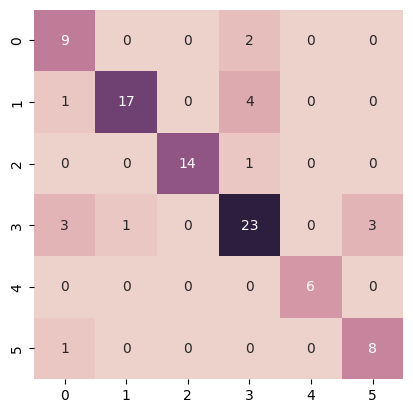

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
path = "/content/gdrive/MyDrive/GhazalRobaeeAlBERT/weights"

In [ ]:
model.save_weights(path)